In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Veri setini yükle
data = pd.read_excel('kayseri_kaza_verileri.xlsx')

In [7]:
# Gereksiz sütunları çıkar (örneğin, ID sütunu gibi)
# data = data.drop(['ID'], axis=1)

In [14]:
# Kategorik sütunları kodlayın (gerekirse)
# Örneğin, pd.get_dummies() veya LabelEncoder() gibi yöntemler kullanılabilir

In [16]:
# Sayısal olmayan sütunları belirle
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

# Sayısal olmayan sütunları veri setinden kaldır
numeric_data = data.drop(columns=non_numeric_columns)

# Sayısal sütunları standartlaştır
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [17]:
# K-means modelini oluştur
kmeans = KMeans(n_clusters=3, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer

# NaN değerleri ortalama ile doldur
imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(scaled_data)

# Model eğitimi
kmeans.fit(data_filled)


KMeans(n_clusters=3, random_state=42)

In [20]:
# Küme merkezlerini al
cluster_centers = kmeans.cluster_centers_

In [21]:
# Her gözlem için küme tahminlerini al
cluster_labels = kmeans.labels_

In [22]:
# Küme tahminlerini veri setine ekleyin
data['Cluster'] = cluster_labels

In [23]:
# Kaza ciddiyetini her küme için hesaplayın (örneğin, ortalama)
cluster_impact = data.groupby('Cluster')['Kaza Ciddiyet Seviyesi'].mean()

In [24]:
# Sonuçları görüntüle
print(cluster_impact)

Cluster
0    0.122998
1    2.778862
2    0.112365
Name: Kaza Ciddiyet Seviyesi, dtype: float64


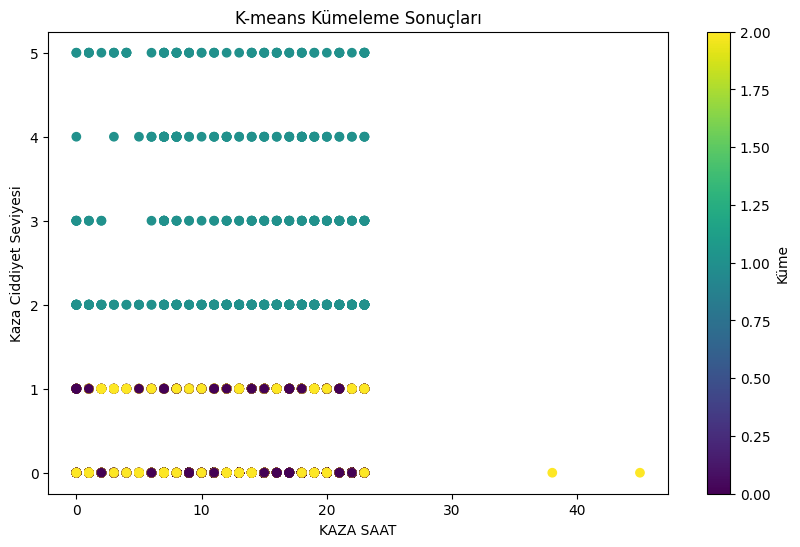

In [25]:
# Kümeleme sonuçlarını görselleştirin (örneğin, Kaza Saati ve Kaza Ciddiyeti)
plt.figure(figsize=(10, 6))
plt.scatter(data['KAZA SAAT'], data['Kaza Ciddiyet Seviyesi'], c=cluster_labels, cmap='viridis')
plt.xlabel('KAZA SAAT')
plt.ylabel('Kaza Ciddiyet Seviyesi')
plt.title('K-means Kümeleme Sonuçları')
plt.colorbar(label='Küme')
plt.show()